In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Read and Understand the data

In [2]:
df = pd.read_csv('dataset.csv')


In [3]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [4]:
df.shape

(365, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


---

## Converting datatypes and fixing the dataset

In [7]:
df['Data'] = pd.to_datetime(df['Data'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [9]:
# Convert dataframes to time series
time_series = df.set_index('Data')['Total_Vendas']
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [10]:
# Gives the frequency of the time series (D = daily, M = monthly, Y = yearly, etc.)
time_series = time_series.asfreq('D')
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

---

## Exploratory Analysis 

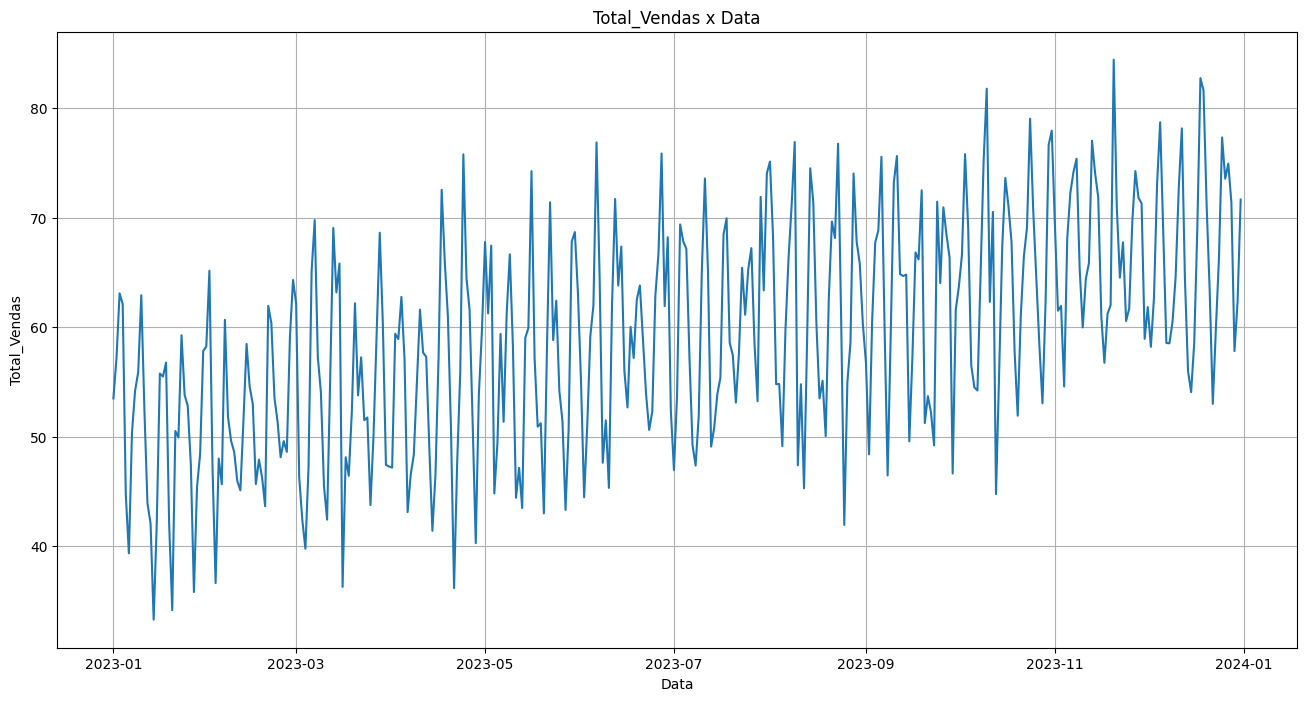

In [13]:
plt.figure(figsize=(16,8))
plt.plot(time_series)
plt.xlabel('Data')
plt.ylabel('Total_Vendas')
plt.title('Total_Vendas x Data')
plt.grid(True)
plt.show()

---

## Model

In [14]:
model = ExponentialSmoothing(time_series)

In [18]:
fixed_model = model.fit(smoothing_level=0.2)

'''
fit() method is used to fit the model to the data. The smoothing_level parameter is used to specify the alpha value. 
The alpha value is used to specify the smoothing factor, it controls the rate at which the influence of the observations at prior time steps raise or
 decay exponentially.
The alpha value must be between 0 and 1. The default value of alpha is 0.6.
'''

'\nfit() method is used to fit the model to the data. The smoothing_level parameter is used to specify the alpha value. \nThe alpha value is used to specify the smoothing factor, it controls the rate at which the influence of the observations at prior time steps raise or\n decay exponentially.\nThe alpha value must be between 0 and 1. The default value of alpha is 0.6.\n'

In [19]:
exponential_smoothed = fixed_model.fittedvalues
"""
Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function.
Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time.
It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality.
"""

'\nExponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function.\nWhereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time.\nIt is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality.\n'

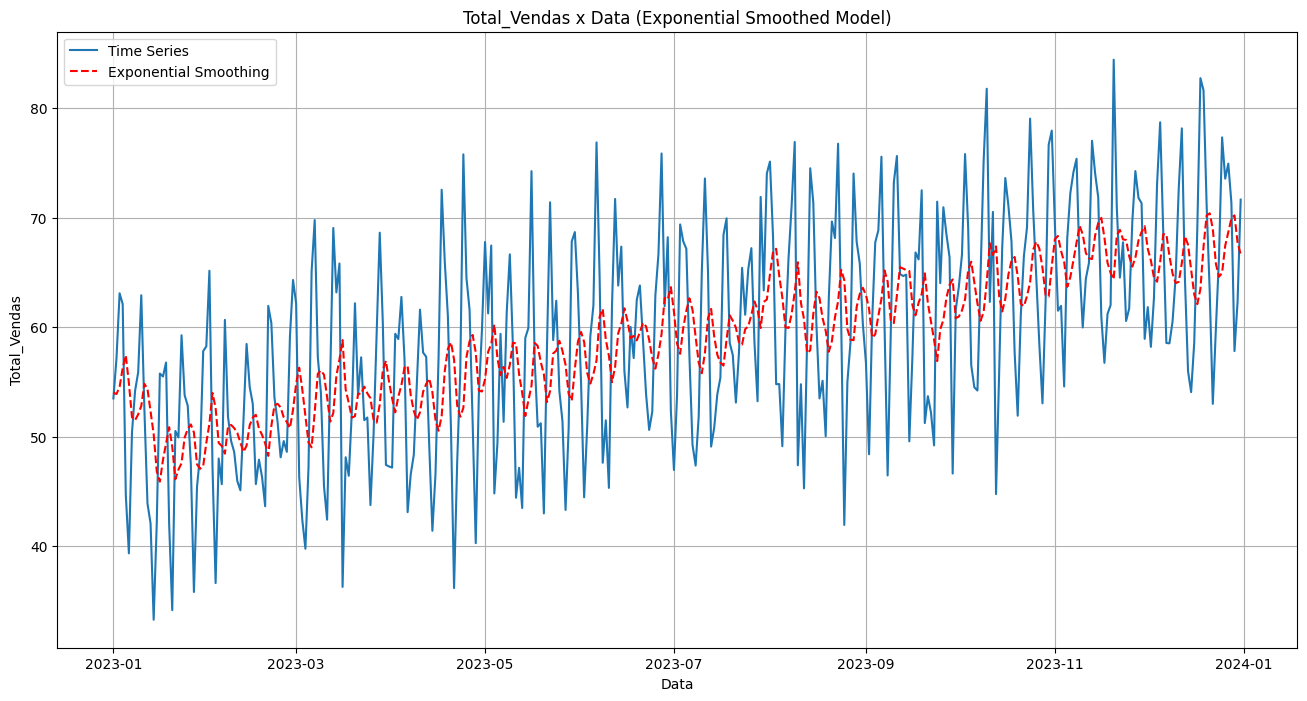

In [23]:
# Plot the smoothed values
plt.figure(figsize=(16,8))
plt.plot(time_series, label='Time Series')
plt.plot(exponential_smoothed, label='Exponential Smoothing', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Total_Vendas')
plt.title('Total_Vendas x Data (Exponential Smoothed Model)')
plt.grid(True)
plt.legend()
plt.show()

---

## Deploy

In [51]:
# Forecasting
previsions_quant = 1
previsions = fixed_model.forecast(steps=previsions_quant)

In [52]:
print(f'Prevision for 2024 january {round(previsions[0], 4)}')
print(previsions)

Prevision for 2024 january 67.6499
2024-01-01    67.649892
Freq: D, dtype: float64
